<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/2020313_Muhammad_ishaq_cv_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import libraries
import numpy as np               
import matplotlib.pyplot as plt
from skimage.io import imshow, imread, imsave
from skimage.transform import downscale_local_mean, pyramid_expand
import skimage
import cv2 as cv
from pathlib import Path
import os


In [ ]:
import glob
fle = '../Downloads/images/*.jpg'
glob.glob(fle)

['../Downloads/images/img5.jpg',
 '../Downloads/images/img4.jpg',
 '../Downloads/images/img6.jpg',
 '../Downloads/images/img3.jpg',
 '../Downloads/images/img2.jpg',
 '../Downloads/images/img1.jpg']

In [ ]:
imgs = [cv.imread(ie) for ie in glob.glob(fle)]

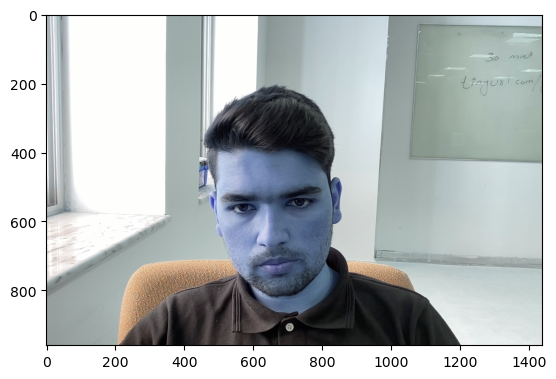

In [ ]:
plt.imshow(imgs[3])

In [ ]:
def save_image(array, output_path):
    """
    Save a NumPy array as an image file.

    Parameters:
    ----------
    array : ndarray
        The NumPy array to be saved as an image. The array should have dimensions (height, width, channels).
    output_path : str
        The path and file name of the output image file. The file format is determined by the file extension.

    Raises:
    ------
    ValueError
        If the input array is not a valid NumPy array or the output path is not a valid string.

    Returns:
    -------
    None
    """
    # Check that the input is a valid array
    if not isinstance(array, np.ndarray) or array.ndim != 3 or array.shape[-1] not in [1, 3, 4]:
        raise ValueError("Input must be a NumPy array with dimensions (height, width, channels)")
    # Check that the output path is a valid string
    if not isinstance(output_path, str):
        raise ValueError("Output path must be a string")
    
    # Save the image to the output path
    ## you code goes here
    
    cv.imwrite(output_path, array)
    
    ## you code goes here

In [ ]:
def apply_HSV(img):
    """
    Applies the HSV (Hue, Saturation, Value) color space to an input image.

    Parameters:
    img (numpy.ndarray): Input image as a numpy array.

    Returns:
    numpy.ndarray: The converted image in HSV color space as a numpy array.
    
    """
    ## you code goes here
    image_HSV = skimage.color.rgb2hsv(img)
    return image_HSV
    ## you code goes here
hsv_img = []
for img in imgs:
    hsv_img.append(apply_HSV(img))

In [ ]:
#plt.imshow(hsv_img[2])

In [ ]:
#save_image(hsv_img[2],'../Downloads/images')

In [ ]:
def apply_LAB(img):
    """
    Applies the LAB color space to an input image.

    Parameters:
    img (numpy.ndarray): Input image as a numpy array.

    Returns:
    numpy.ndarray: The converted image in LAB color space as a numpy array.
    
    """
    ## you code goes here
    image_LAB = skimage.color.rgb2lab(img)
    return image_LAB   
    ## you code goes here
    
    
lab_img = []
for img in imgs:
    lab_img.append(apply_LAB(img))

In [ ]:
def cany(imgg):
    img=cv.cvtColor(imgg, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    edges = cv.Canny(gray, 50, 50)
    return edges

def apply_Hough_transform(edges, threshold, min_line_length, max_line_gap):
    """
    Apply the Hough transform to an edge image to detect straight lines.

    Parameters
    ----------
    edges : ndarray
        Edge image to apply the Hough transform to.
    threshold : int
        Threshold value to apply during the Hough transform.
    min_line_length : int
        Minimum length of a detected line segment.
    max_line_gap : int
        Maximum gap between segments to be considered part of the same line.

    Returns
    -------
    lines : ndarray
        Array of lines detected by the Hough transform in (rho, theta) format.

    Notes
    -----
    The Hough transform is a popular technique for detecting straight lines in an
    image. This implementation uses the OpenCV library to perform the transform.

    """
    ## you code goes here
    lines = cv.HoughLinesP(edges, 1, np.pi/180, minLineLength=min_line_length, maxLineGap=max_line_gap,threshold=threshold)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
    return img
    ## you code goes here
    
    
huf_img = []
for img in imgs:
    huf_img.append(apply_Hough_transform(cany(img),10,10,120))

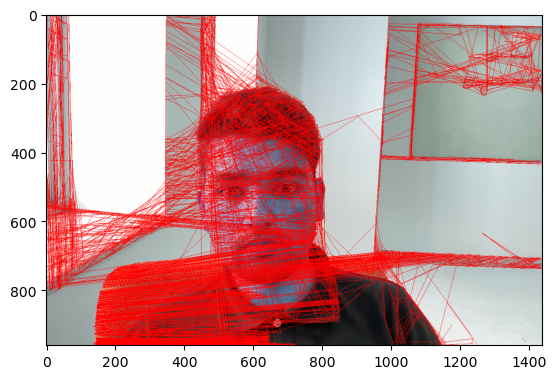

In [ ]:
plt.imshow(huf_img[0])

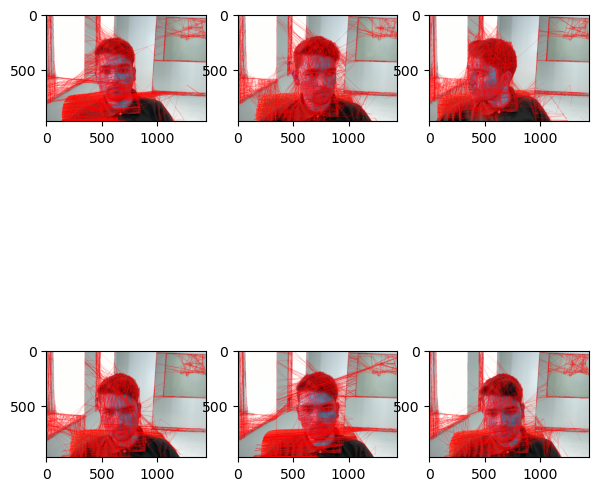

In [ ]:
r = 2
c = 3
fig = plt.figure(figsize = (7,8))
for j in range(0,r*c):
  fig.add_subplot(r,c,j+1)
  plt.imshow(huf_img[j])

In [ ]:
def apply_Gaussian_Blur(img, sigma=10, multichannel=True):
    """
    Apply Gaussian blur filter to the input image.

    Parameters:
    ----------
    img : ndarray
        Input image to be filtered.
    sigma : float, optional
        Standard deviation of the Gaussian kernel. Default is 10.
    multichannel : bool, optional
        Whether the input image is a color image or not. Default is False.

    Returns:
    -------
    ndarray
        Filtered image with the same shape as the input image.

    Raises:
    ------
    ValueError
        If the input image is not a valid numpy array.
        If the sigma value is not a positive float.
    """
    ## you code goes here 
    filtered_img = skimage.filters.gaussian(img, sigma=sigma, multichannel=multichannel)
    ## you code goes here
    return filtered_img
gus_img = []
for img in imgs:
    gus_img.append(apply_Gaussian_Blur(img,10))    

/var/folders/ph/d5rkl1m93176xgtl24l7gfqr0000gn/T/ipykernel_76826/1680007487.py:26: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_img = skimage.filters.gaussian(img, sigma=sigma, multichannel=multichannel)


In [ ]:
#plt.imshow(gus_img[0])

In [ ]:
from skimage.transform import downscale_local_mean, pyramid_expand
def apply_downscale_local_mean(img, factors):
    """
    Apply local mean downsampling to an image.

    Args:
        img (numpy.ndarray): The input image as a numpy array.
        factors (tuple): A tuple of two integers representing the downsampling
            factor along each image axis.

    Returns:
        numpy.ndarray: A numpy array representing the downscaled image.

    Raises:
        ValueError: If the shape of img is not compatible with the downsampling
            factors, or if any factor is not a positive integer.
    """
    ## you code goes here
    image_dp = downscale_local_mean(img, factors=(factors, factors, 1)).astype(int)
    return image_dp    
    ## you code goes here
    
    
dwn_scl_img = []
for img in imgs:
    dwn_scl_img.append(apply_downscale_local_mean(img,10)) 

In [ ]:
#plt.imshow(dwn_scl_img[0])

In [ ]:
def apply_pyramid_expand(img, upscale):
    """
    Applies Gaussian pyramid expansion to an input image by repeatedly upsampling and blurring.

    Parameters:
    img (numpy.ndarray): Input image as a numpy array.
    upscale (int): Number of times to upscale the image.

    Returns:
    numpy.ndarray: The expanded image as a numpy array.
    
    """
    ## you code goes here
    image_dp_gray = skimage.color.rgb2gray(img)
    upsampled_img = pyramid_expand(image_dp_gray, upscale=upscale) 
    image_up = skimage.color.gray2rgb(upsampled_img)
    return image_up
    ## you code goes here
up_scl_img = []
for img in imgs:
    up_scl_img.append(apply_downscale_local_mean(img,10))     
    

In [ ]:
#plt.imshow(up_scl_img[0])

In [ ]:
def apply_image_dilation(img, kernel=np.ones((7, 7), np.uint8), iterations=1):
    """
    Apply a dilation filter to the input image.

    Parameters:
    ----------
    img : ndarray
        Input image to be filtered.
    kernel : ndarray, optional
        Structuring element used for the dilation operation. Default is a 7x7 square kernel with all elements set to 1.
    iterations : int, optional
        Number of times the dilation operation is applied. Default is 1.

    Returns:
    -------
    ndarray
        Dilated image with the same shape as the input image.

    Raises:
    ------
    ValueError
        If the input image or kernel is not a valid numpy array.
        If the kernel has an invalid shape.
    """
    ## you code goes here
    image_gray = skimage.color.rgb2gray(img)
    image_gray=image_gray/255
    dilated_img = cv.dilate(image_gray, kernel, iterations=iterations)
    ## you code goes here
dilate_img = []
for img in imgs:
    dilate_img.append(apply_downscale_local_mean(img,10))          

In [ ]:
#plt.imshow(dilate_img[0])

In [ ]:
def apply_image_erusion(img, kernel=np.ones((7, 7), np.uint8), iterations=5):
    """
    Apply an erosion filter to the input image.

    Parameters:
    ----------
    img : ndarray
        Input image to be filtered.
    kernel : ndarray, optional
        Structuring element used for the erosion operation. Default is a 7x7 square kernel with all elements set to 1.
    iterations : int, optional
        Number of times the erosion operation is applied. Default is 5.

    Returns:
    -------
    ndarray
        Eroded image with the same shape as the input image.

    Raises:
    ------
    ValueError
        If the input image or kernel is not a valid numpy array.
        If the kernel has an invalid shape.
    """
    ## you code goes here
    image_gray = skimage.color.rgb2gray(img)
    image_gray=image_gray/255
    eroded_img = cv.erode(image_gray, kernel, iterations=iterations)
    return eroded_img 
    
    ## you code goes here
    
    
erod_img = []
for img in imgs:
    erod_img.append(apply_downscale_local_mean(img,10))

In [ ]:
#plt.imshow(erod_img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


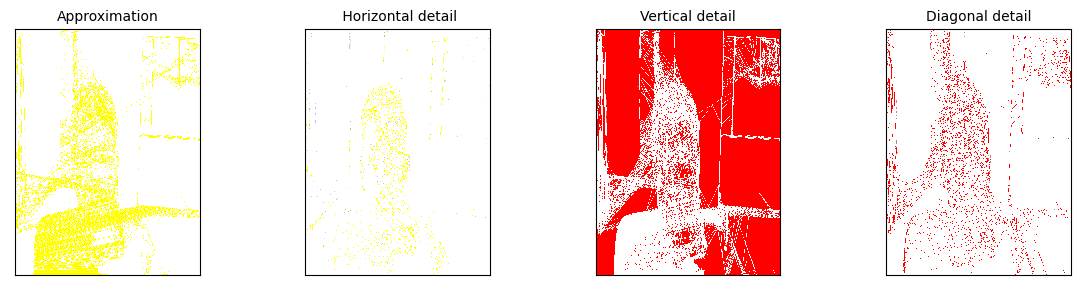

TypeError: Image data of dtype object cannot be converted to float

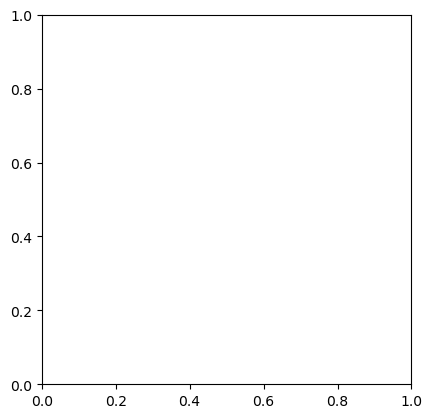

In [ ]:
import pywt
def apply_Wavelet_transform(img,titles,interpolation,cmap):
    """
    Apply a wavelet transform to an input image.

    Parameters
    ----------
    img : ndarray
        Input image to apply the wavelet transform to.
    titles : list of str
        Titles to use for each subplot in the output plot.
    interpolation : str, optional
        Interpolation method to use when displaying the output plot.
        Defaults to 'nearest'.
    cmap : str, optional
        Colormap to use when displaying the output plot.
        Defaults to 'gray'.

    Returns
    -------
    None

    """
    
    ## you code goes here
    titles = titles
    coeffs2 = pywt.dwt2(img, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation=interpolation, cmap=cmap)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()
    
    ## you code goes here
    
plt.imshow(apply_Wavelet_transform(imgs[0],['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail'],"nearest",plt.cm.gray))

In [ ]:
import cv2
def apply_SIFT_detector(img):
    """
    Apply the Scale-Invariant Feature Transform (SIFT) algorithm to an input image.

    Parameters
    ----------
    img : ndarray
        Input image to apply the SIFT algorithm to.

    Returns
    -------
    kps : list of Keypoint
        List of keypoints detected by the SIFT algorithm.
    descs : ndarray
        Matrix of descriptors computed for the keypoints.

    Notes
    -----
    The SIFT algorithm detects and describes keypoint features in an image that are
    invariant to scale, rotation, and affine distortion. This implementation uses
    the OpenCV library to compute SIFT features.

    """
    ## you code goes here
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray, None)
    return kp
    # Marking the keypoint on the image using circles
    #img=cv2.drawKeypoints(gray ,kp ,img ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    ## you code goes here
plt.imshow(apply_SIFT_detector(imgs[0]))

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [ ]:
def apply_unsharp_mask(img, radius=1.0, amount=1.0, multichannel=False):
    """
    Apply an unsharp mask filter to the input image.

    Parameters:
    ----------
    img : ndarray
        Input image to be filtered.
    radius : float, optional
        Radius of the Gaussian blur kernel. Default is 1.0.
    amount : float, optional
        Strength of the sharpening effect. Default is 1.0.
    multichannel : bool, optional
        Whether the input image is a color image or not. Default is False.

    Returns:
    -------
    ndarray
        Filtered image with the same shape as the input image.

    Raises:
    ------
    ValueError
        If the input image is not a valid numpy array.
        If the radius or amount value is not a positive float.
    """
    
    ## you code goes here
    
    
    
    ## you code goes here